In [1]:
import os

path = './/'

jpg_files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            jpg_files.append(os.path.join(r, file))

len(jpg_files)

19344

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean
from multiprocessing import Pool

(1234, 608)


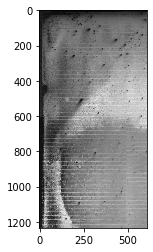

In [3]:
image_2 = mpimg.imread(".//PL/2019/05/14/19513EAP/40_A1MAHP0226" + '.jpg')
x = image_2[0:image_2.shape[0]//2, 0:image_2.shape[1]//8]
plt.imshow(x, cmap='gray')
print(x.shape)

In [10]:
image_2.shape

(2469, 4870)

In [4]:
plt.imsave("x.png", x, cmap='gray')

In [5]:
4870/8

608.75

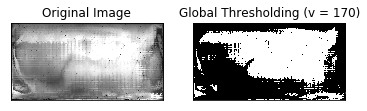

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(".//PL/2019/05/14/19513EAP/40_A1MAHP0226" + '.jpg',0)
img = cv.medianBlur(img,5)
v = 170
ret,th1 = cv.threshold(img,v,255,cv.THRESH_BINARY)
titles = ['Original Image', 'Global Thresholding (v = ' + str(v) + ')']
images = [img, th1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

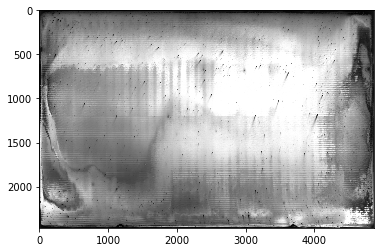

In [7]:
plt.imshow(img, cmap='gray', aspect='auto')

Text(0.5, 1.0, 'Fourier transform')

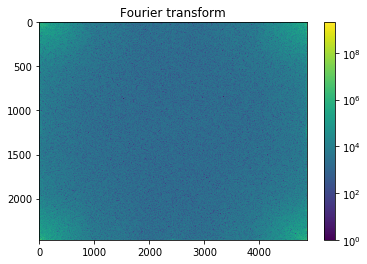

In [28]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=1), aspect='auto')
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

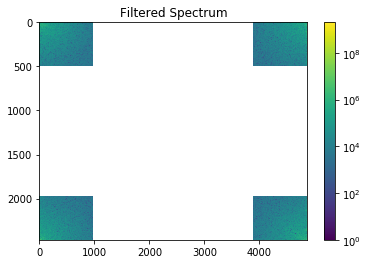

In [31]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.2

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

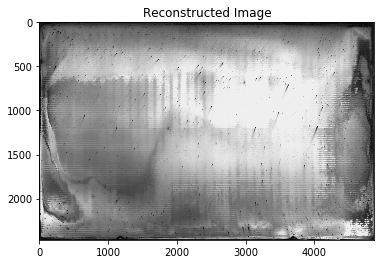

In [32]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray, aspect='auto')
plt.title('Reconstructed Image')

In [33]:
plt.imsave("im_new.png", im_new, cmap='gray')

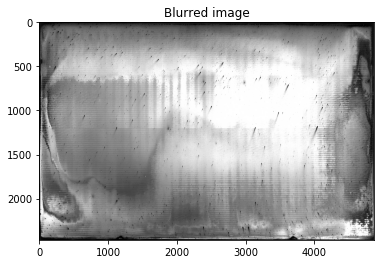

In [17]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(img, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray, aspect='auto')
plt.title('Blurred image')

plt.show()

In [18]:
plt.imsave("im_blur.png", im_blur, cmap='gray')